In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('/content/drive/MyDrive/multi-class-GAN/data/credit-score.csv')

In [ ]:
data.describe()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
count,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000
mean,21.095718,13.336345,5.774570,32.284544,221.122819,193.665219,403.445100,33.269228,50498.704153,5.368868,5.532853,14.535174,3.533974,4196.814288,10.396953,1426.514966,105.565802
std,14.827414,6.269964,3.862224,5.116888,99.696084,194.782737,214.387092,10.762371,38294.243161,2.591668,2.067698,8.741047,2.446156,3186.518163,6.510846,1155.252504,125.820983
min,0.000000,0.000000,0.000000,20.000000,1.000000,0.000000,0.007760,14.000000,7005.930000,0.000000,0.000000,1.000000,0.000000,303.645417,0.500000,0.230000,0.000000
25%,10.000000,9.000000,3.000000,28.052051,144.000000,73.708522,270.317007,24.000000,19338.480000,3.000000,4.000000,7.000000,2.000000,1626.594167,5.500000,566.080000,29.054273
50%,18.000000,14.000000,5.000000,32.305470,219.000000,129.342067,337.237873,33.000000,36996.830000,5.000000,5.000000,13.000000,3.000000,3091.386667,9.340000,1166.470000,66.058063
75%,28.000000,18.000000,8.000000,36.496305,302.000000,234.323706,471.904834,42.000000,71681.400000,7.000000,7.000000,20.000000,5.000000,5957.715000,14.680000,1948.200000,145.584994
max,67.000000,28.000000,29.000000,50.000000,404.000000,1977.326102,1602.040519,56.000000,179987.280000,10.000000,11.000000,34.000000,9.000000,15204.633333,29.980000,4998.070000,1779.103254


In [ ]:
data.dtypes

,0
Delay_from_due_date,float64
Num_of_Delayed_Payment,float64
Num_Credit_Inquiries,float64
Credit_Utilization_Ratio,float64
Credit_History_Age,float64
Payment_of_Min_Amount,object
Amount_invested_monthly,float64
Monthly_Balance,float64
Credit_Score,object
Credit_Mix,object


In [ ]:
data.isnull().sum()

,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Num_Credit_Inquiries,0
Credit_Utilization_Ratio,0
Credit_History_Age,0
Payment_of_Min_Amount,0
Amount_invested_monthly,0
Monthly_Balance,0
Credit_Score,0
Credit_Mix,0


,proportion
Credit_Score,
Standard,0.531703
Poor,0.289996
Good,0.178301


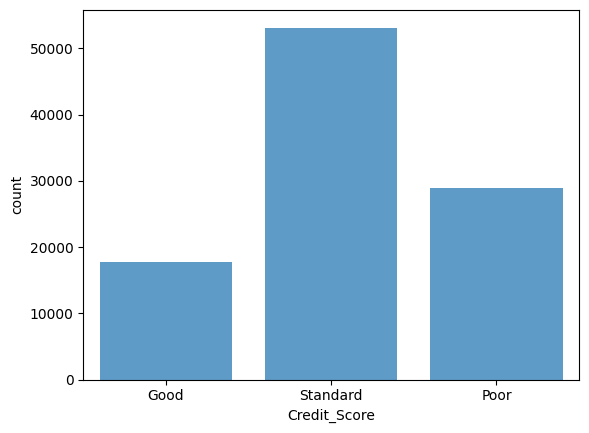

In [4]:
# Target variable distribution
sns.countplot(data=data, x='Credit_Score', color='#4C9ED9')
# Proportion of classes
data['Credit_Score'].value_counts(normalize=True)

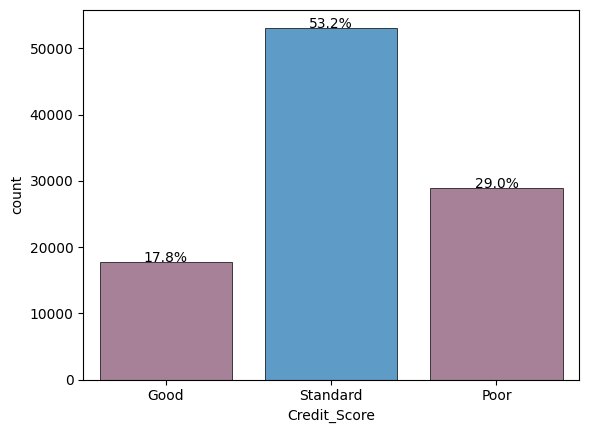

In [16]:
# Sample data countplot
ax = sns.countplot(data=data, x='Credit_Score',hue='Credit_Score', palette={'Standard': '#4C9ED9','Good': '#AD7B9A', 'Poor': '#AD7B9A'},edgecolor='black', linewidth=0.5)

# Calculate and annotate percentages
total = len(data['Credit_Score'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'  # Calculate percentage
    x = p.get_x() + p.get_width() / 2  # Center the text on the bar
    y = p.get_height()  # Position text above the bar
    ax.text(x, y + 1, percentage, ha='center')  # Add text above each bar

# Show plot
plt.show()

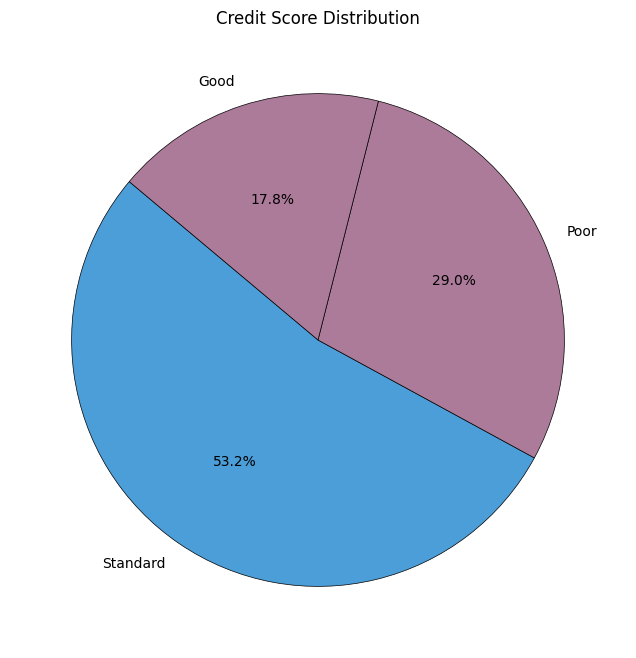

In [17]:
import matplotlib.pyplot as plt

# Count the occurrences of each 'Credit_Score' category
counts = data['Credit_Score'].value_counts()
labels = counts.index  # Get the unique labels
sizes = counts.values  # Get the counts for each category

# Define colors for each category
colors = ['#4C9ED9' if label == 'Standard' else '#AD7B9A' for label in labels]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 0.5})

# Display the plot
plt.title("Credit Score Distribution")
plt.show()

<Axes: >

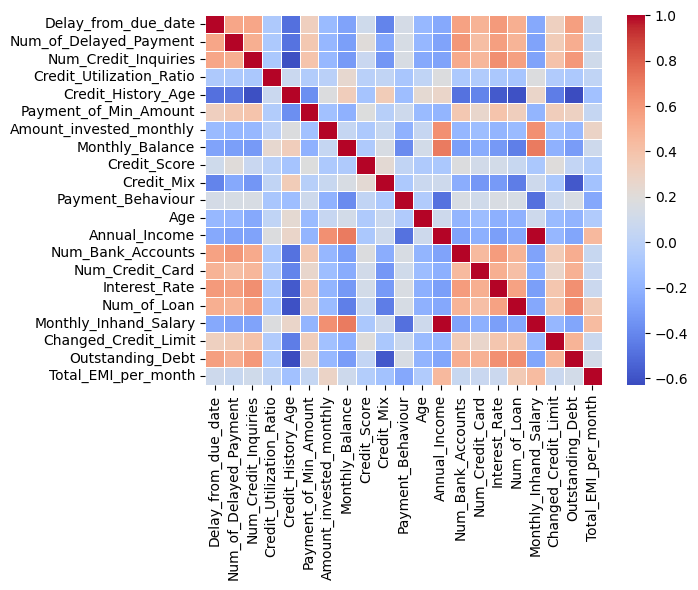

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_e=LabelEncoder()
data['Credit_Score']=label_e.fit_transform(data['Credit_Score'])
data['Credit_Mix']=label_e.fit_transform(data['Credit_Mix'])
data['Payment_Behaviour']=label_e.fit_transform(data['Payment_Behaviour'])
data['Payment_of_Min_Amount']=label_e.fit_transform(data['Payment_of_Min_Amount'])

data.corr()['Credit_Score'].sort_values(ascending=False)
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)

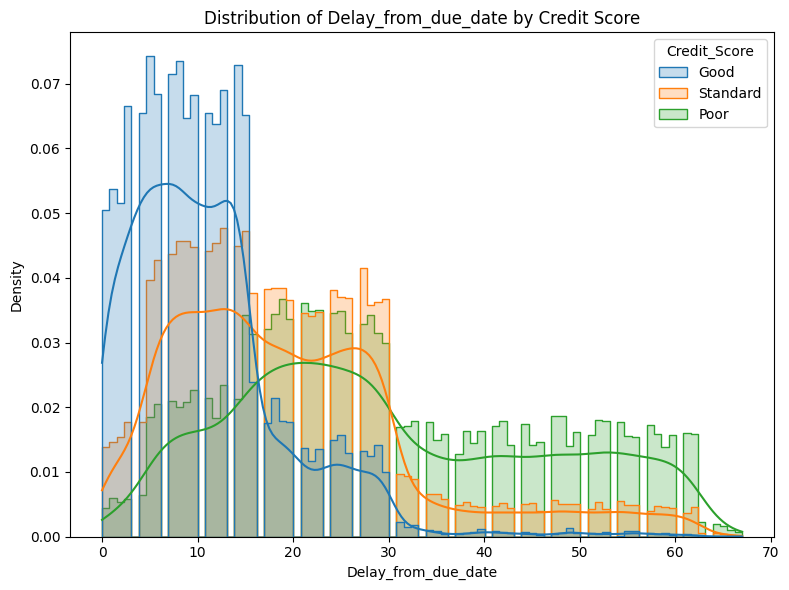

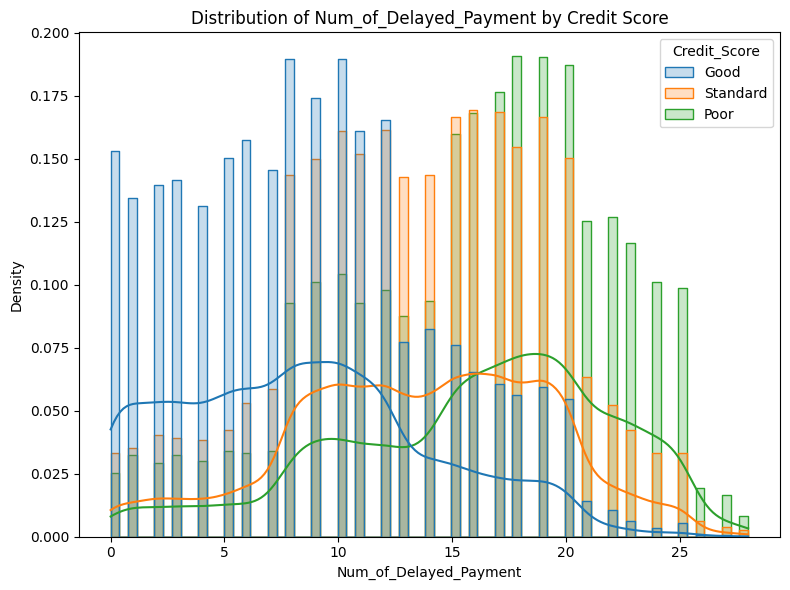

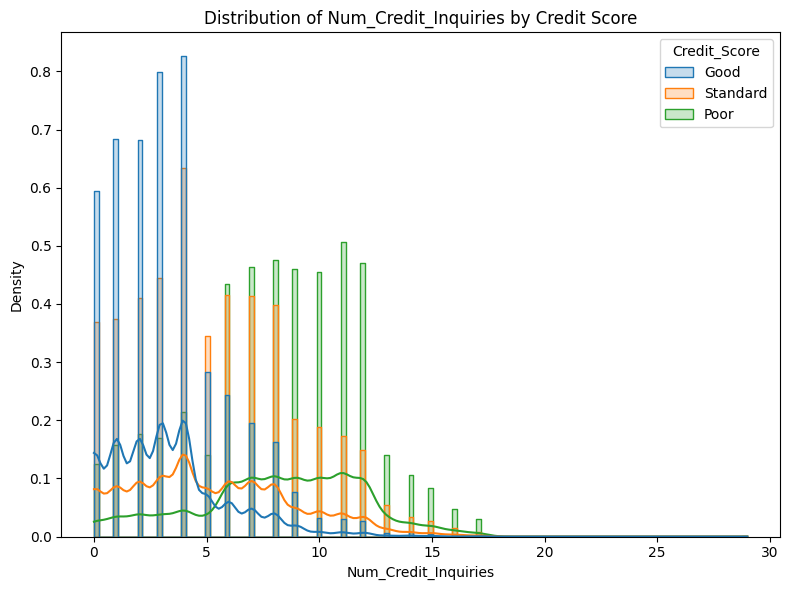

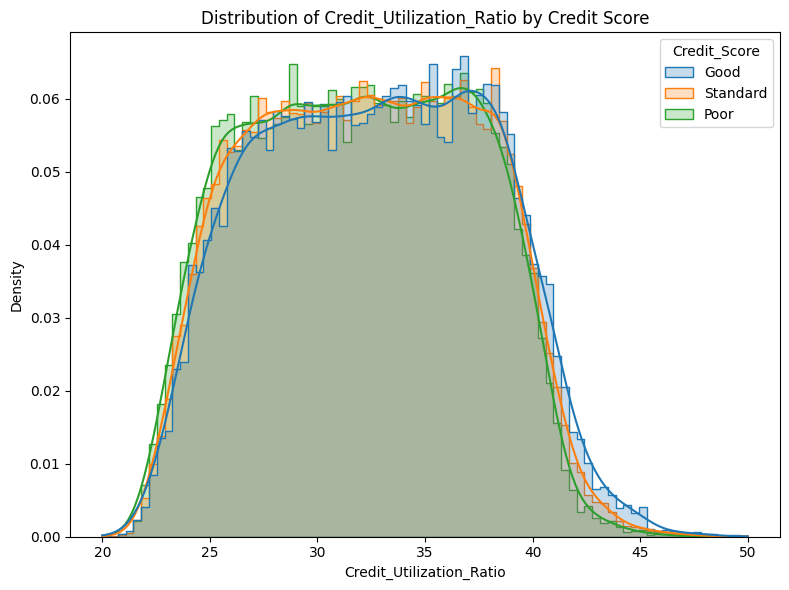

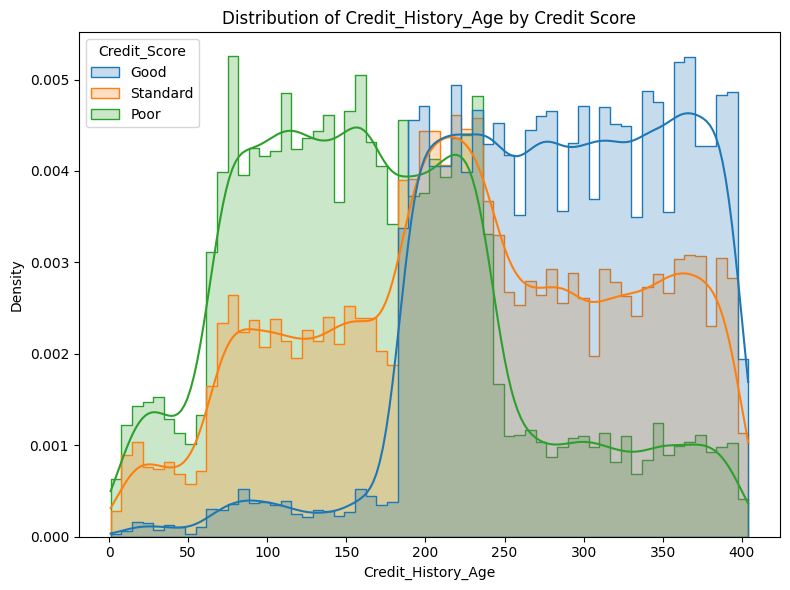

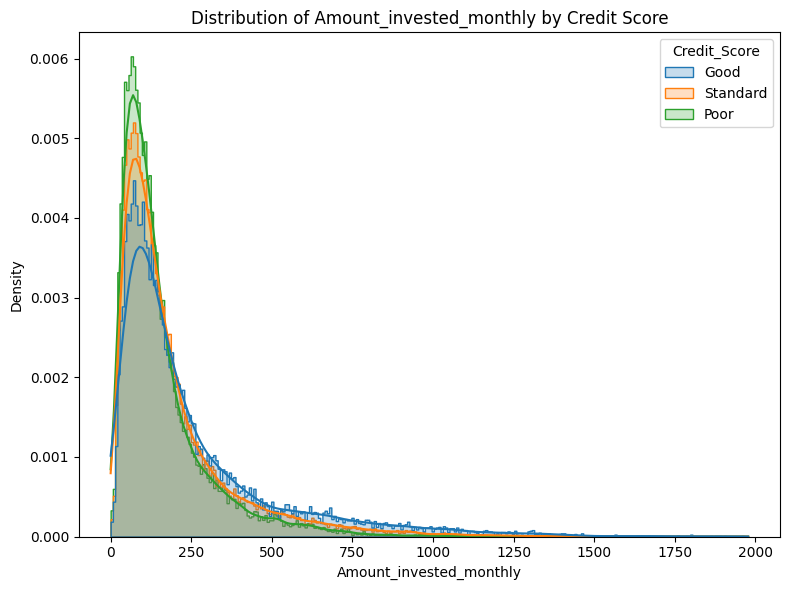

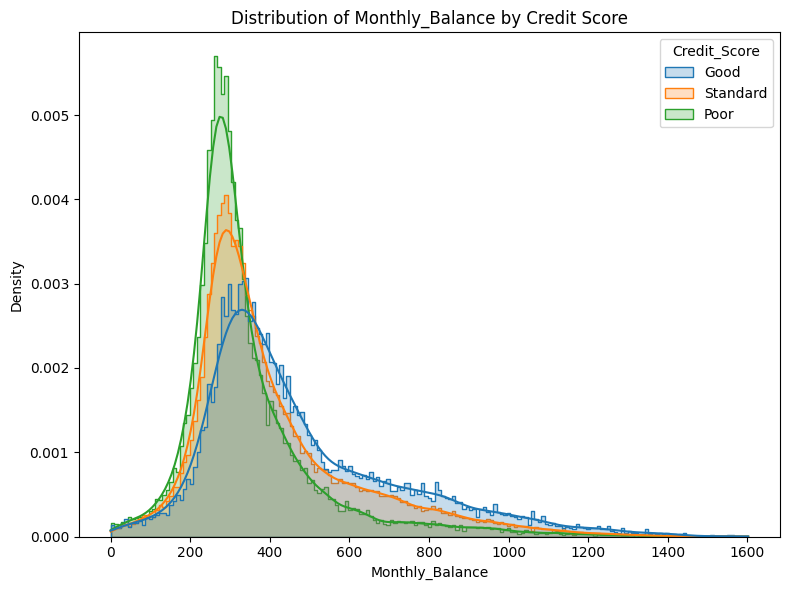

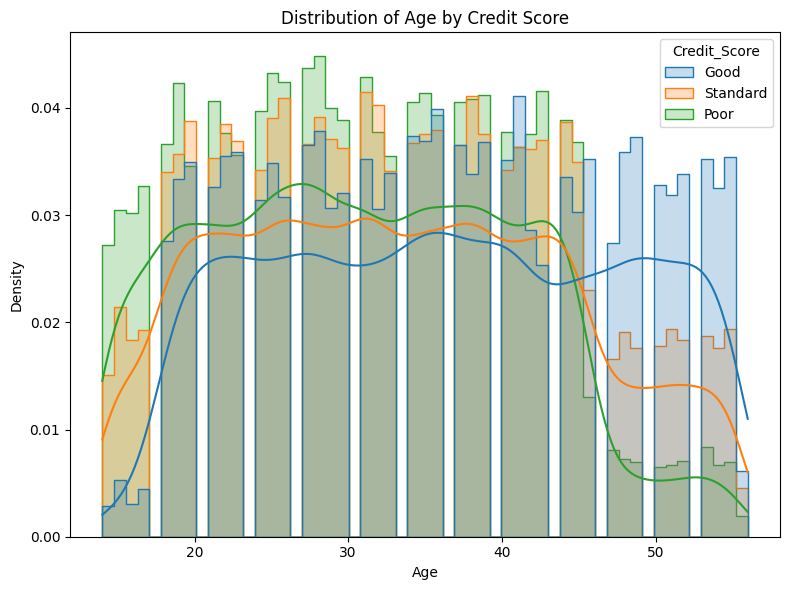

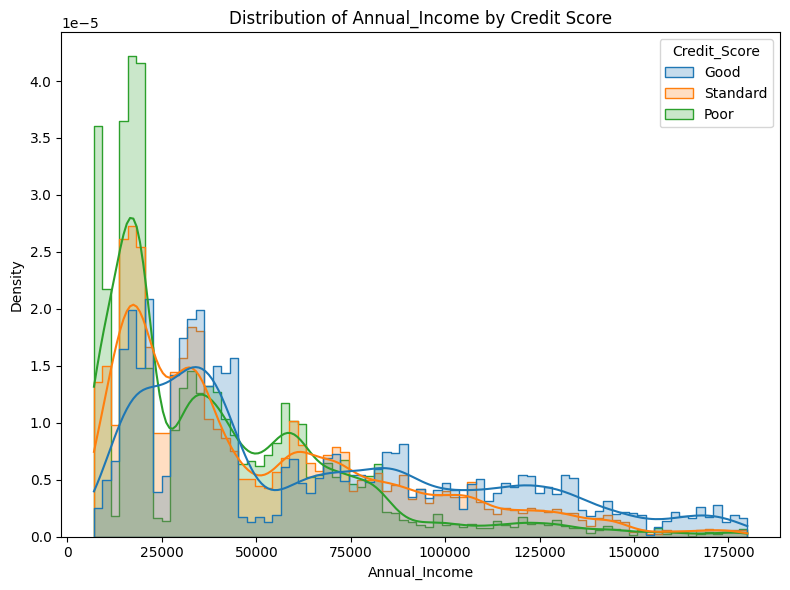

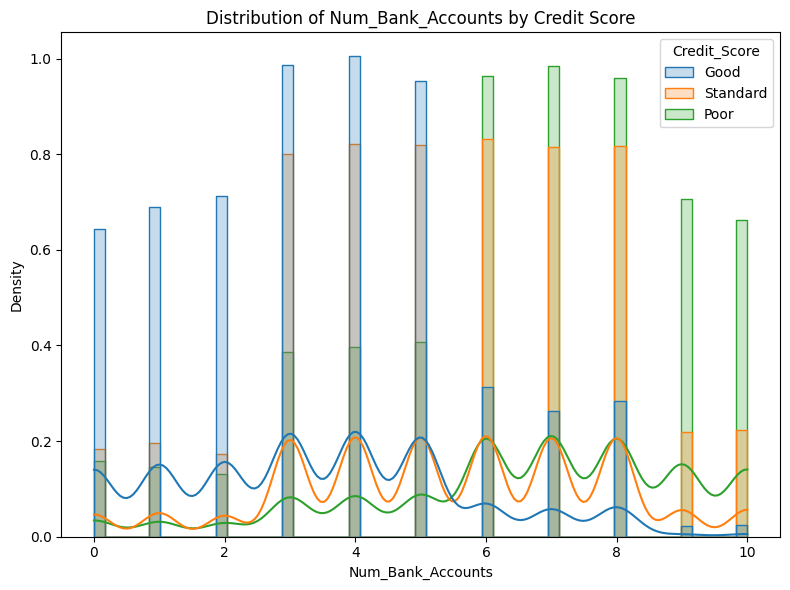

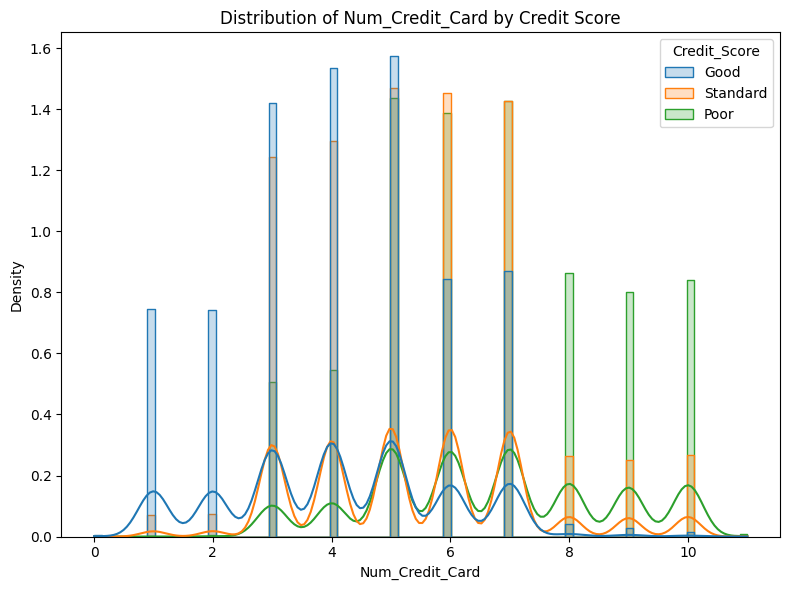

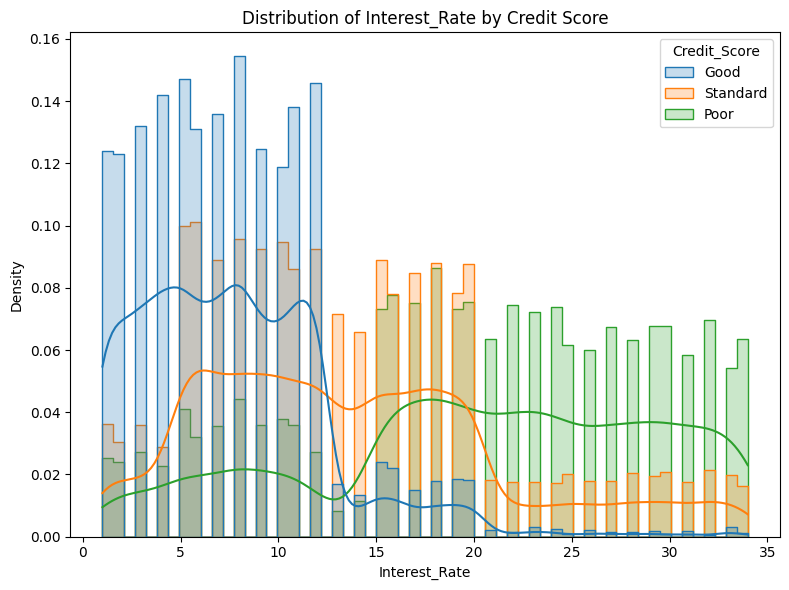

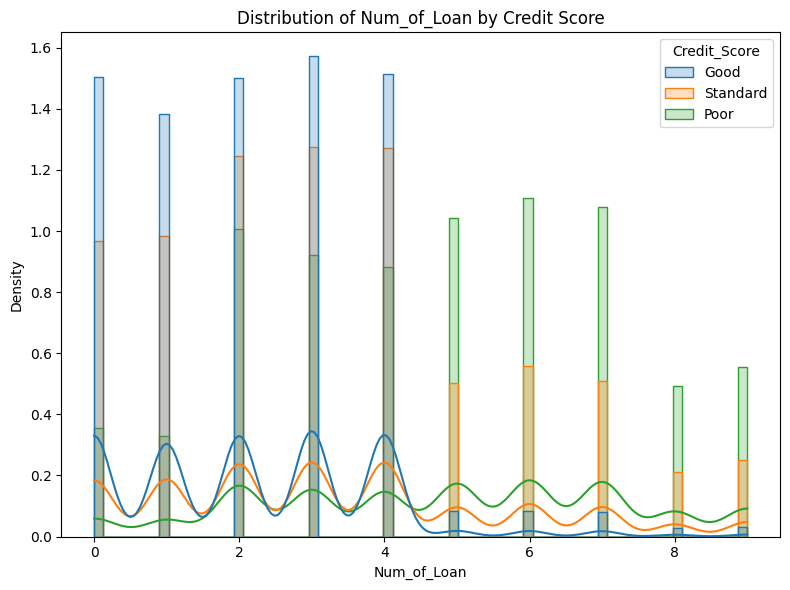

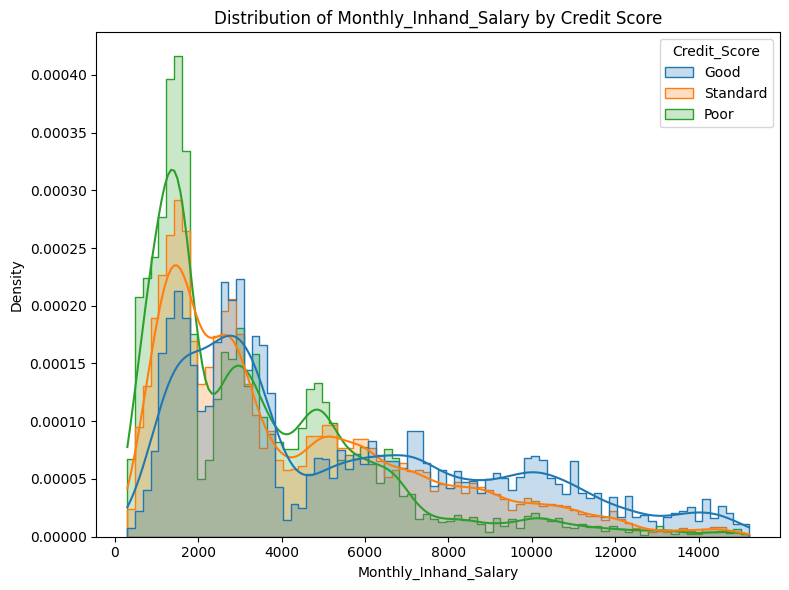

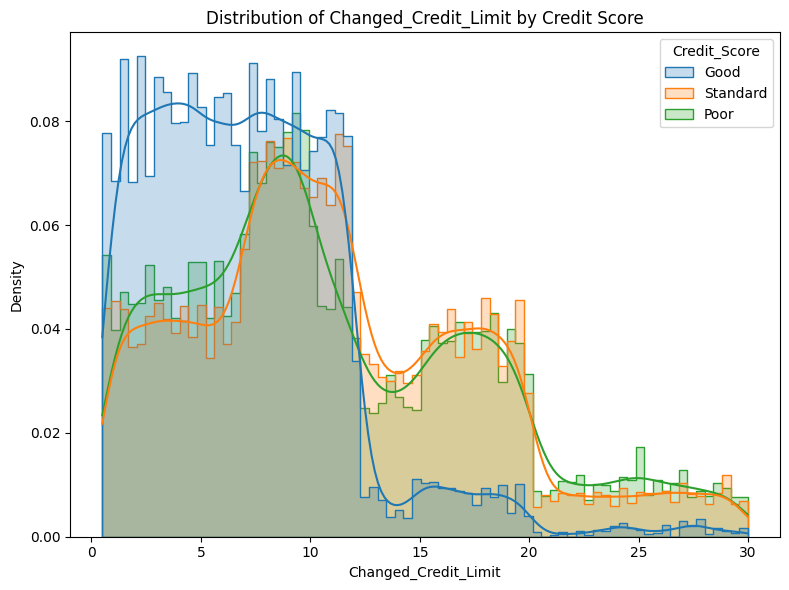

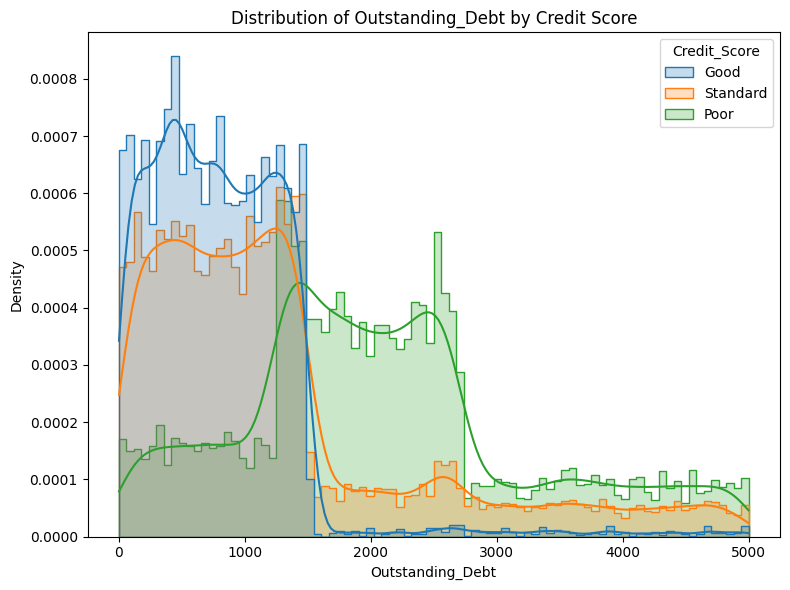

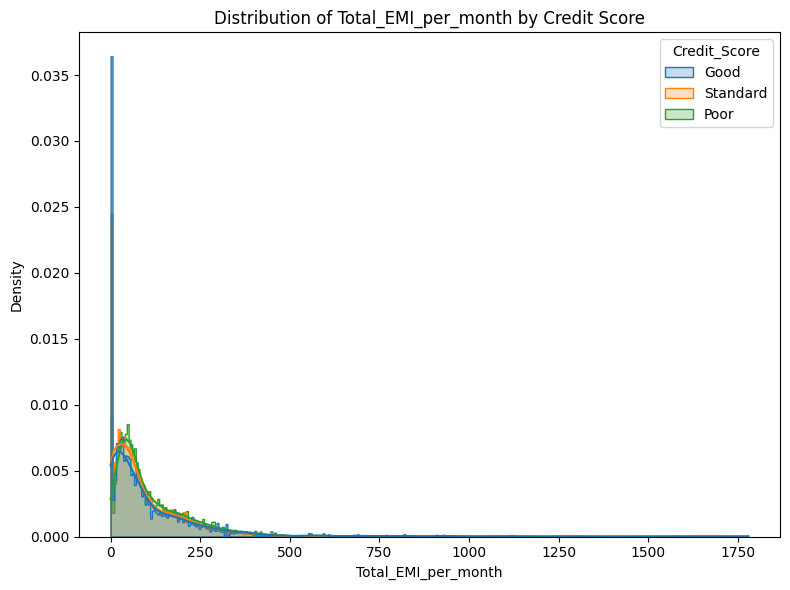

In [ ]:
import seaborn as sns


numerical_columns = [
    'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio',
    'Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance', 'Age', 'Annual_Income',
    'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Monthly_Inhand_Salary',
    'Changed_Credit_Limit', 'Outstanding_Debt', 'Total_EMI_per_month'
]

for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='Credit_Score', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f"Distribution of {col} by Credit Score")
    plt.tight_layout()
    plt.show()

In [ ]:
X=data.drop(['Credit_Score'],axis=1)
y=data['Credit_Score']

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, recall_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Assuming you have X, y data
# Binarize the output labels for AUC calculation (One-vs-Rest)
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Predict probabilities for AUC calculation
y_score = xgb_model.predict_proba(X_test)

# Predict the labels for G-Mean calculation
y_pred = xgb_model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), digits=3))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:28:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 75.53%

Classification Report:
              precision    recall  f1-score   support

           0      0.577     0.809     0.673      5417
           1      0.778     0.739     0.758      8723
           2      0.838     0.746     0.789     15848

    accuracy                          0.755     29988
   macro avg      0.731     0.765     0.740     29988
weighted avg      0.773     0.755     0.759     29988



In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, recall_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Assuming you have X, y data
# Binarize the output labels for AUC calculation (One-vs-Rest)
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict probabilities for AUC calculation
y_score = rf_model.predict_proba(X_test)

# Predict the labels for G-Mean calculation
y_pred = rf_model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), digits=3))

Accuracy: 79.71%

Classification Report:
              precision    recall  f1-score   support

           0      0.692     0.784     0.735      5417
           1      0.800     0.808     0.804      8723
           2      0.838     0.795     0.816     15848

    accuracy                          0.797     29988
   macro avg      0.777     0.796     0.785     29988
weighted avg      0.801     0.797     0.798     29988



In [ ]:
# Import necessary libraries
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, recall_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the LightGBM classifier
lgbm_model = LGBMClassifier(n_estimators=500, learning_rate=0.1, max_depth=6, objective='multiclass')

# Train the model
lgbm_model.fit(X_train, y_train)

# Predict probabilities for AUC calculation
y_score = lgbm_model.predict_proba(X_test)

# Predict the labels for G-Mean calculation
y_pred = lgbm_model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2529
[LightGBM] [Info] Number of data points in the train set: 69972, number of used features: 20
[LightGBM] [Info] Start training from score -1.729915
[LightGBM] [Info] Start training from score -1.239200
[LightGBM] [Info] Start training from score -0.629075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

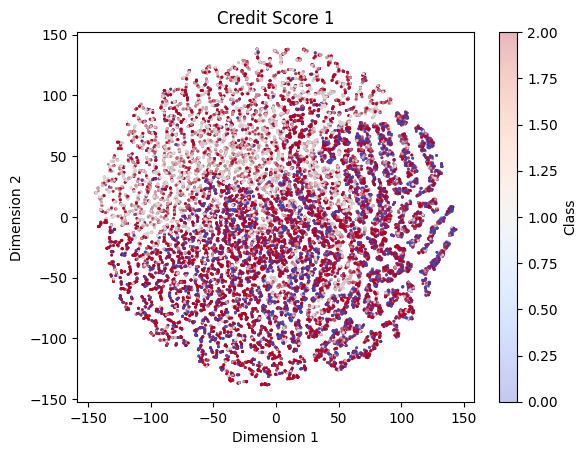

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

features = data.drop(['Credit_Score'], axis=1)
labels = data['Credit_Score']

 #Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedded_features = tsne.fit_transform(features)

# Plotting the embedded features
plt.scatter(embedded_features[:, 0], embedded_features[:, 1], c=labels, cmap='coolwarm',s=1,alpha=0.3)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Credit Score 1')
plt.colorbar(label='Class')
plt.show()

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier()

# Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))

Accuracy: 73.87%

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.67      0.68      5417
           1       0.73      0.73      0.73      8723
           2       0.76      0.77      0.76     15848

    accuracy                           0.74     29988
   macro avg       0.73      0.72      0.72     29988
weighted avg       0.74      0.74      0.74     29988



In [ ]:
majority_number=data[data['Credit_Score'] == 2].shape[0] #standard class

poor_n=data[data['Credit_Score'] == 1].shape[0] #poor class
good_n=data[data['Credit_Score'] == 0].shape[0] #good class

data_gen_poor=data[data['Credit_Score']==1]
data_gen_good=data[data['Credit_Score']==0]

samples_to_generate_poor=majority_number-poor_n
samples_to_generate_good=majority_number-good_n

In [ ]:
!pip install ctgan
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.3/152.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.6/51.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.5/170.5 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 6.6 MB/s eta 0:00:00


In [ ]:
from ctgan import CTGAN
batch_size = 5000
epochs = 100
model = CTGAN(batch_size=batch_size, epochs=epochs, verbose=True)
model.fit(data_gen_poor)
synthetic_data_poor = model.sample(samples_to_generate_poor)

Gen. (0.21) | Discrim. (-0.55): 100%|██████████| 100/100 [08:29<00:00,  5.09s/it]


In [ ]:
model.fit(data_gen_good)
synthetic_data_good = model.sample(samples_to_generate_good)

Gen. (-1.18) | Discrim. (0.12): 100%|██████████| 100/100 [04:56<00:00,  2.96s/it]


In [ ]:
synt_data=pd.concat([synthetic_data_poor,synthetic_data_good])
synt_data.to_csv('synt_data_ctgan.csv',index=False)

In [ ]:
data_concat=pd.concat([data,synthetic_data_poor,synthetic_data_good])
data_concat.to_csv('credit-score-1-ctgan(2).csv',index=False)

In [ ]:
data_concat=pd.read_csv('/content/drive/MyDrive/multi-class-GAN/data/credit-score-1-ctgan2.csv')

In [ ]:
from scipy.stats import wasserstein_distance
distance = []

for col in data.columns:
    dist = wasserstein_distance(data[col], data_concat[col])
    distance.append(dist)
    print(f"Feature: {col} | Wasserstein Distance: {dist:.3f}")

average_wasserstein_distance = np.mean(distance)
print(f"\nAverage Wasserstein Distance: {average_wasserstein_distance:.3f}")

Feature: Delay_from_due_date | Wasserstein Distance: 1.170
Feature: Num_of_Delayed_Payment | Wasserstein Distance: 0.594
Feature: Num_Credit_Inquiries | Wasserstein Distance: 0.133
Feature: Credit_Utilization_Ratio | Wasserstein Distance: 0.713
Feature: Credit_History_Age | Wasserstein Distance: 6.781
Feature: Payment_of_Min_Amount | Wasserstein Distance: 0.077
Feature: Amount_invested_monthly | Wasserstein Distance: 16.961
Feature: Monthly_Balance | Wasserstein Distance: 7.552
Feature: Credit_Score | Wasserstein Distance: 0.353
Feature: Credit_Mix | Wasserstein Distance: 0.107
Feature: Payment_Behaviour | Wasserstein Distance: 0.174
Feature: Age | Wasserstein Distance: 0.345
Feature: Annual_Income | Wasserstein Distance: 1195.349
Feature: Num_Bank_Accounts | Wasserstein Distance: 0.339
Feature: Num_Credit_Card | Wasserstein Distance: 0.177
Feature: Interest_Rate | Wasserstein Distance: 0.529
Feature: Num_of_Loan | Wasserstein Distance: 0.102
Feature: Monthly_Inhand_Salary | Wasserstei

In [ ]:
from scipy.stats import ks_2samp

stats=[]
for col in data.columns:
    stat, p_value = ks_2samp(data[col], data_concat[col])
    stats.append(stat)
    print(f"Feature: {col} | KS Statistic: {stat:.3f} | p-value: {p_value}")

avg_stat = np.mean(stats)
print(f"\nAverage KS Statistic: {avg_stat:.8f}")

Feature: Delay_from_due_date | KS Statistic: 0.060 | p-value: 9.347445249117622e-194
Feature: Num_of_Delayed_Payment | KS Statistic: 0.056 | p-value: 8.8787906899644e-168
Feature: Num_Credit_Inquiries | KS Statistic: 0.038 | p-value: 1.059776202681893e-77
Feature: Credit_Utilization_Ratio | KS Statistic: 0.046 | p-value: 2.1459699607204892e-111
Feature: Credit_History_Age | KS Statistic: 0.038 | p-value: 6.20949945700121e-76
Feature: Payment_of_Min_Amount | KS Statistic: 0.073 | p-value: 4.455193968914999e-285
Feature: Amount_invested_monthly | KS Statistic: 0.049 | p-value: 4.292191754593546e-126
Feature: Monthly_Balance | KS Statistic: 0.036 | p-value: 1.9637851137151695e-71
Feature: Credit_Score | KS Statistic: 0.198 | p-value: 0.0
Feature: Credit_Mix | KS Statistic: 0.105 | p-value: 0.0
Feature: Payment_Behaviour | KS Statistic: 0.045 | p-value: 3.364580513375456e-109
Feature: Age | KS Statistic: 0.027 | p-value: 9.908335089141214e-39
Feature: Annual_Income | KS Statistic: 0.031 | 

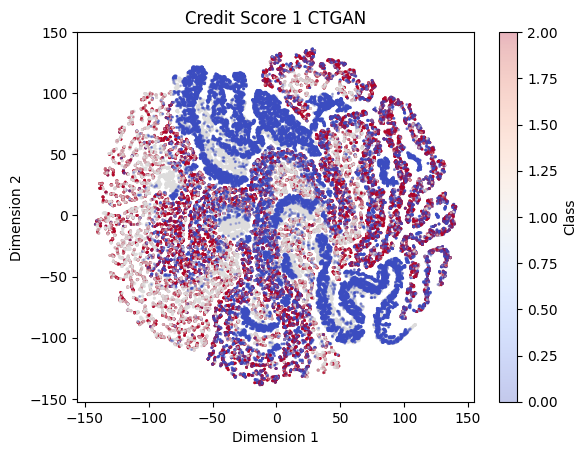

In [ ]:
features = data_concat.drop(['Credit_Score'], axis=1)
labels = data_concat['Credit_Score']

 #Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedded_features = tsne.fit_transform(features)

# Plotting the embedded features
plt.scatter(embedded_features[:, 0], embedded_features[:, 1], c=labels, cmap='coolwarm',s=1,alpha=0.3)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Credit Score 1 CTGAN')
plt.colorbar(label='Class')
plt.show()

In [ ]:
X=data_concat.drop(['Credit_Score'],axis=1)
y=data_concat['Credit_Score']

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, recall_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Assuming you have X, y data
# Binarize the output labels for AUC calculation (One-vs-Rest)
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Predict probabilities for AUC calculation
y_score = xgb_model.predict_proba(X_test)

# Predict the labels for G-Mean calculation
y_pred = xgb_model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), digits=3))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:44:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 83.10%

Classification Report:
              precision    recall  f1-score   support

           0      0.791     0.935     0.857     15968
           1      0.878     0.837     0.857     15964
           2      0.834     0.721     0.773     15903

    accuracy                          0.831     47835
   macro avg      0.834     0.831     0.829     47835
weighted avg      0.834     0.831     0.829     47835



In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, recall_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Assuming you have X, y data
# Binarize the output labels for AUC calculation (One-vs-Rest)
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict probabilities for AUC calculation
y_score = rf_model.predict_proba(X_test)

# Predict the labels for G-Mean calculation
y_pred = rf_model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), digits=3))

Accuracy: 86.96%

Classification Report:
              precision    recall  f1-score   support

           0      0.875     0.928     0.901     15968
           1      0.886     0.897     0.891     15964
           2      0.845     0.783     0.813     15903

    accuracy                          0.870     47835
   macro avg      0.869     0.870     0.869     47835
weighted avg      0.869     0.870     0.869     47835



In [ ]:
# Import necessary libraries
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, recall_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the LightGBM classifier
lgbm_model = LGBMClassifier(n_estimators=500, learning_rate=0.1, max_depth=6, objective='multiclass')

# Train the model
lgbm_model.fit(X_train, y_train)

# Predict probabilities for AUC calculation
y_score = lgbm_model.predict_proba(X_test)

# Predict the labels for G-Mean calculation
y_pred = lgbm_model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4347
[LightGBM] [Info] Number of data points in the train set: 111612, number of used features: 20
[LightGBM] [Info] Start training from score -1.099231
[LightGBM] [Info] Start training from score -1.099123
[LightGBM] [Info] Start training from score -1.097484
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier()

# Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred,digits=3))

Accuracy: 81.95%

Classification Report:
              precision    recall  f1-score   support

           0      0.874     0.875     0.875     15968
           1      0.838     0.827     0.832     15964
           2      0.747     0.757     0.752     15903

    accuracy                          0.820     47835
   macro avg      0.820     0.819     0.820     47835
weighted avg      0.820     0.820     0.820     47835



In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the K-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors (k) as needed

# Train the KNN model
knn_model.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the classification report with 3 decimal precision
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))

Accuracy: 74.87%

Classification Report:
              precision    recall  f1-score   support

           0      0.750     0.769     0.760     15968
           1      0.762     0.727     0.744     15964
           2      0.734     0.750     0.742     15903

    accuracy                          0.749     47835
   macro avg      0.749     0.749     0.749     47835
weighted avg      0.749     0.749     0.749     47835



In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed for convergence

# Train the Logistic Regression model
logreg_model.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the classification report with 3 decimal precision
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 64.25%

Classification Report:
              precision    recall  f1-score   support

           0      0.675     0.759     0.714     15968
           1      0.700     0.752     0.725     15964
           2      0.519     0.416     0.461     15903

    accuracy                          0.643     47835
   macro avg      0.631     0.642     0.634     47835
weighted avg      0.632     0.643     0.634     47835

